## Objective
You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

Evaluation Criteria
Submissions are evaluated using the F1 Score. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

About the dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

Survived_1_year == 1, implies that the patient survived after 1 year of treatment


## Data Description:

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Referenced: https://www.kaggle.com/code/manishkc06/patient-survival-after-one-year-of-treatment/notebook

## Load Libraries

In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


## Load Data

In [2]:
df = pd.read_csv('Train_Data.csv')
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


## Data Preparation

Dropping some not necessary columns

In [3]:
df.drop(['ID_Patient_Care_Situation', 'Patient_ID'], inplace = True, axis = 1)
df

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,3,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,41,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,24,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,11,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


Checking for any duplicates

In [4]:
#check is there any duplicates
check_duplicate = df.duplicated().sum()
check_duplicate

48

Removing the duplicates

In [5]:
# removing the duplicates
df.drop_duplicates(keep=False,inplace=True)


In [6]:
df.duplicated().sum()

0

## EDA

In [7]:
df['Diagnosed_Condition'].value_counts()

11    489
12    481
49    479
52    469
43    467
7     465
36    464
18    462
8     460
17    459
40    458
34    458
24    458
1     455
45    453
5     452
21    452
19    451
29    450
46    448
41    447
35    447
31    443
33    443
3     442
51    442
4     441
39    440
23    439
30    439
16    438
9     438
13    436
20    435
6     435
15    432
27    432
22    432
25    429
44    428
37    425
32    425
28    424
26    421
42    421
47    420
2     417
48    414
10    414
38    413
14    408
50    399
0      13
Name: Diagnosed_Condition, dtype: int64

In [8]:
df["Treated_with_drugs"].value_counts()

DX6                     8541
DX5                     1905
DX2                     1894
DX1                     1831
DX3                     1822
DX4                     1790
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX3 DX5                  407
DX1 DX4                  406
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [9]:
df["Patient_Smoker"].value_counts()

NO            13196
YES            9793
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [10]:
df["Patient_mental_condition"].value_counts()

Stable    23002
Name: Patient_mental_condition, dtype: int64

In [11]:
df["Patient_Rural_Urban"].value_counts()

RURAL    16059
URBAN     6943
Name: Patient_Rural_Urban, dtype: int64

In [12]:
df.shape

(23002, 16)

In [13]:
# A concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23096
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       23002 non-null  int64  
 1   Treated_with_drugs        22989 non-null  object 
 2   Patient_Age               23002 non-null  int64  
 3   Patient_Body_Mass_Index   23002 non-null  float64
 4   Patient_Smoker            23002 non-null  object 
 5   Patient_Rural_Urban       23002 non-null  object 
 6   Patient_mental_condition  23002 non-null  object 
 7   A                         21777 non-null  float64
 8   B                         21777 non-null  float64
 9   C                         21777 non-null  float64
 10  D                         21777 non-null  float64
 11  E                         21777 non-null  float64
 12  F                         21777 non-null  float64
 13  Z                         21777 non-null  float64
 14  Number

### Observations:

There are 23002 observations divided into 15 columns after removing some unwanted columns.
There are some missing values in the dataset.

In [14]:
df.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23002.000000,23002.000000,23002.000000,21777.000000,21777.000000,21777.000000,21777.000000,21777.000000,21777.000000,21777.000000,21777.000000,23002.000000
mean,26.425311,33.187592,23.452987,0.897874,0.136520,0.185149,0.083483,0.392846,0.053726,0.000597,1.750195,0.632423
std,15.030150,19.544513,3.808902,0.302821,0.343348,0.388428,0.276617,0.488394,0.225482,0.024426,0.770479,0.482156
min,0.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,33.000000,23.385161,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,39.000000,50.000000,26.788491,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,52.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


Observe the target variable data distribution

Unique Value Counts
 1    14547
0     8455
Name: Survived_1_year, dtype: int64


<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

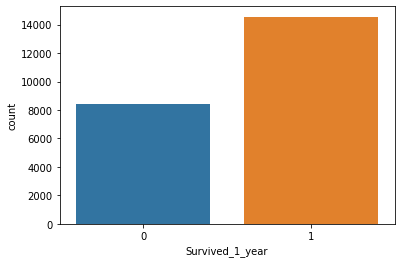

In [15]:
# For checking of Y value data distribution (for check is the data balance)
print('Unique Value Counts\n',df['Survived_1_year'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=df,x='Survived_1_year')

### Findings
There are 8000+ who did not survive, however there are 14000+ patients who survive

## Next, we will perform EDA on our continuous variables (for numerical values only)


In [16]:
# getting only the numerical features
numeric_features = result = df.select_dtypes(include='number')    # select_dtypes helps you to select data of particular types 
numeric_features.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [17]:
numeric_data=df[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]  #keeping in the target varibale for analysis purposes
numeric_data

# Number_of_prev_cond is dependent on 7 columns - A, B, C, D, E, F, Z


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
0,8,56,18.479385,2.0
1,5,36,22.945566,1.0
2,23,48,27.510027,1.0
3,51,5,19.130976,1.0
4,0,128,1.348400,1.0
...,...,...,...,...
23092,3,14,18.643448,5.0
23093,41,55,23.684585,1.0
23094,24,63,27.500039,1.0
23095,11,25,23.719125,2.0


 Checking is there any null values for the numeric data

In [18]:
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1225
dtype: int64

There are 1225 of missing values in Number_of_prev_cond

In [19]:
df["Number_of_prev_cond"].mode()


0    1.0
dtype: float64

In [20]:
df['Number_of_prev_cond'] = df['Number_of_prev_cond'].fillna(df['Number_of_prev_cond'].median())  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=df['Number_of_prev_cond']
numeric_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
dtype: int64

In [21]:
numeric_data.describe()



,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
count,23002.000000,23002.000000,23002.000000,23002.000000
mean,26.425311,33.187592,23.452987,1.763499
std,15.030150,19.544513,3.808902,0.751777
min,0.000000,0.000000,1.089300,1.000000
25%,13.000000,16.000000,20.205050,1.000000
50%,26.000000,33.000000,23.385161,2.000000
75%,39.000000,50.000000,26.788491,2.000000
max,52.000000,149.000000,29.999579,5.000000


Finding the correlation of numerical values

<AxesSubplot:>

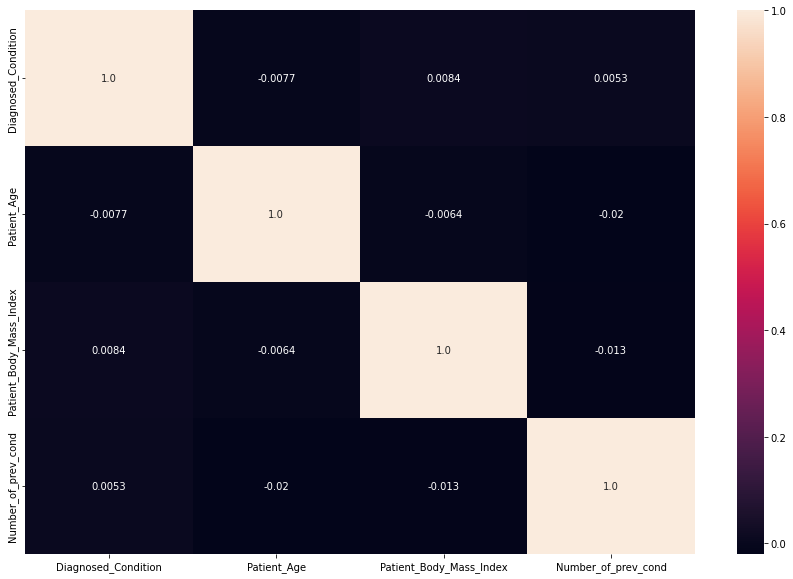

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(),annot=True,fmt='.2')



In [23]:
# cheking the null values for whole dataset
df.isnull().sum()


Diagnosed_Condition            0
Treated_with_drugs            13
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1225
B                           1225
C                           1225
D                           1225
E                           1225
F                           1225
Z                           1225
Number_of_prev_cond            0
Survived_1_year                0
dtype: int64

Fill up missing values

In [24]:
# Fill for Treated_with_drugs
df['Treated_with_drugs']=df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0])

In [25]:
df['A'].fillna(df['A'].median(), inplace = True)
df['B'].fillna(df['B'].median(), inplace = True)
df['C'].fillna(df['C'].median(), inplace = True)
df['D'].fillna(df['D'].median(), inplace = True)
df['E'].fillna(df['E'].median(), inplace = True)
df['F'].fillna(df['F'].median(), inplace = True)
df['Z'].fillna(df['Z'].median(), inplace = True)


In [26]:
df.isnull().sum()

Diagnosed_Condition         0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
dtype: int64

### EDA for Categorical Data
Let's perform Exploratory Data Analysis on the Categorical data.
In the categorical_data variable we'll keep all the categorical features and remove the others.

Note that the features are not being removed from the main dataset - data. We'll select features with a feature selection technique later.

In [27]:
categorical_data = df.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,DX6,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23092,DX2 DX4,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0
23093,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23094,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23095,DX3,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


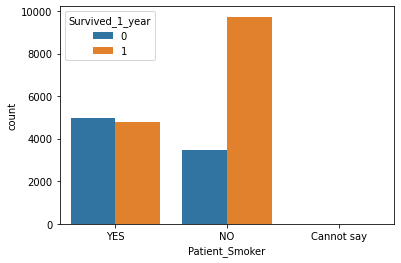

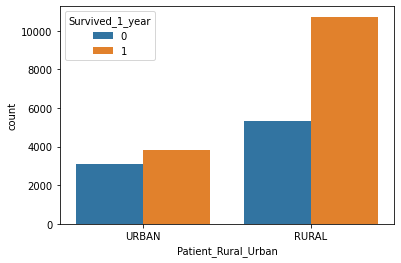

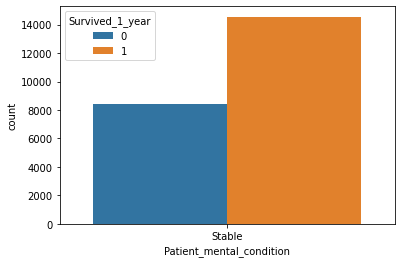

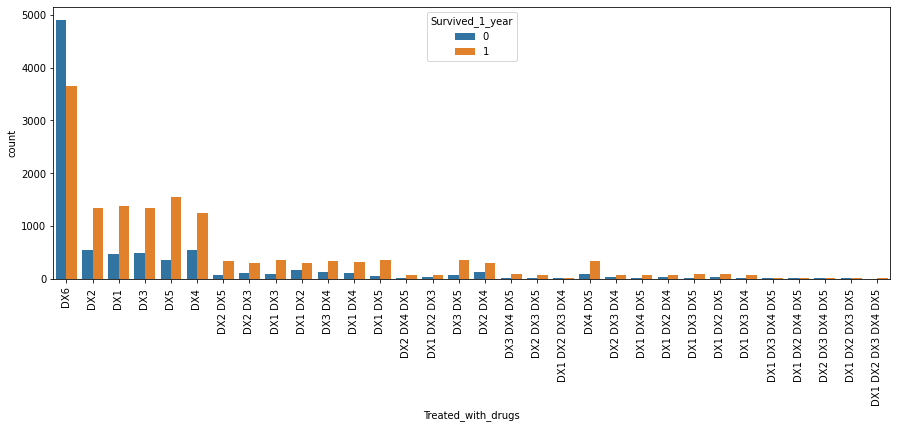

In [28]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
    sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
    plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing for Categorical values

We have discussed in our sessions that machine learning models accepts only numerical data. 'Treated_with_drugs' column is a categorical column and has values as combination of one or more drugs. Let's split all those combined drugs into individual drugs and create dummies for that.

In [29]:
drugs = df['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [30]:
df = pd.concat([df, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
df = df.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

df.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,5,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,0,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


There can be different ways to deal with the category 'Cannot say'. Here we will remove the rows that had "Cannot say"

In [31]:
# remove data in Patient_Smoker that has annoymous
df = df[df["Patient_Smoker"] != "Cannot say"]
df['Patient_Smoker'].value_counts()

NO     13196
YES     9793
Name: Patient_Smoker, dtype: int64

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features.

In [32]:
df.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [33]:
df = pd.get_dummies(df, columns=['Patient_Smoker', 'Patient_Rural_Urban'])
df

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
5,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,3,14,18.643448,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,1,0,0,1,0,1,0
23093,41,55,23.684585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
23094,24,63,27.500039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
23095,11,25,23.719125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0


Now finally the data is cleaned

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22989 entries, 0 to 23096
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        22989 non-null  int64  
 1   Patient_Age                22989 non-null  int64  
 2   Patient_Body_Mass_Index    22989 non-null  float64
 3   A                          22989 non-null  float64
 4   B                          22989 non-null  float64
 5   C                          22989 non-null  float64
 6   D                          22989 non-null  float64
 7   E                          22989 non-null  float64
 8   F                          22989 non-null  float64
 9   Z                          22989 non-null  float64
 10  Number_of_prev_cond        22989 non-null  float64
 11  Survived_1_year            22989 non-null  int64  
 12  DX1                        22989 non-null  int64  
 13  DX2                        22989 non-null  int

In [35]:
df.isnull().sum()

Diagnosed_Condition          0
Patient_Age                  0
Patient_Body_Mass_Index      0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
Patient_Smoker_NO            0
Patient_Smoker_YES           0
Patient_Rural_Urban_RURAL    0
Patient_Rural_Urban_URBAN    0
dtype: int64

In [36]:
# Write the cleaned data to a new CSV file
df.to_csv("cleaned_data.csv",index=False)

### Loading with New cleaned dataset for training model

In [37]:
cleaned = pd.read_csv('cleaned_data.csv')
cleaned

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22984,3,14,18.643448,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,1,0,0,1,0,1,0
22985,41,55,23.684585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
22986,24,63,27.500039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
22987,11,25,23.719125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0


Unique Value Counts
 1    14534
0     8455
Name: Survived_1_year, dtype: int64


<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

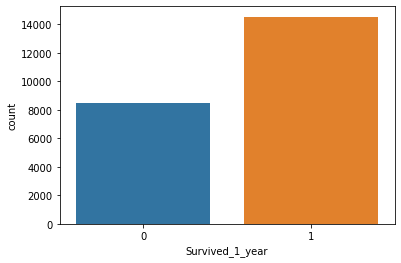

In [38]:
# For checking of Y value data distribution (for check is the data balance)
print('Unique Value Counts\n',cleaned['Survived_1_year'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=cleaned,x='Survived_1_year')

### Splitting X and Y Data


In [39]:
X = cleaned.drop('Survived_1_year',axis = 1)
y = cleaned['Survived_1_year']

### Fixing the imbalanced data with SMOTE

In [40]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts() 

0    14534
1    14534
Name: Survived_1_year, dtype: int64

### Train Test Split

In [41]:
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.20)


### Train Models

In [42]:
clf_log = LogisticRegression(max_iter = 1000) 
clf_gnb = GaussianNB()
clf_tree= DecisionTreeClassifier() 
clf_knn = KNeighborsClassifier()
clf_xgb = XGBClassifier()


models = [clf_log,clf_gnb,clf_tree,clf_knn, clf_xgb]

for x in models:
    x.fit(train_x, train_y) # fit the model
    y_pred= x.predict(test_x) # then predict on the test set 
    accuracy= accuracy_score(test_y, y_pred) # this gives us how often the algorithm predicted correctly
    print(f"The accuracy of model {type(x).__name__} is {accuracy * 100}")
    print(f"F1-Score {type(x).__name__} is {f1_score(test_y,y_pred)}")
    print("\n")

for model in models:
    model.fit(train_x, train_y) # fit the model
    y_pred= model.predict(test_x) # then predict on the test set
    accuracy= accuracy_score(test_y, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(test_y, y_pred) # with the report, we have a bigger picture, with precision and recall for each class

    #print(f"The accuracy of model {type(model).__name__} is {accuracy * 100}")
    print(f"Model: {type(model).__name__}")

    print(clf_report)
    print("\n")

The accuracy of model LogisticRegression is 72.68377555458895
F1-Score LogisticRegression is 0.7967637540453074


The accuracy of model GaussianNB is 71.8790778599391
F1-Score GaussianNB is 0.7719978839710809


The accuracy of model DecisionTreeClassifier is 76.66376685515442
F1-Score DecisionTreeClassifier is 0.8134886146358422


The accuracy of model KNeighborsClassifier is 72.55328403653762
F1-Score KNeighborsClassifier is 0.7894561227894561


[20:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of model XGBClassifier is 82.99260548064376
F1-Score XGBClassifier is 0.8663704716336296


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1712
           1       0.75   

# Testing with the Test Data

In [43]:
testing_data = pd.read_csv("Test_Data.csv")
testing_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


## EDA Test data

In [44]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [45]:
testing_data["Treated_with_drugs"].value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX3 DX4               41
DX1 DX2 DX5               41
DX2 DX3 DX4               40
DX1 DX2 DX3               40
DX3 DX4 DX5               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX2 DX3 DX4 DX5            8
DX1 DX2 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

In [46]:
testing_data["Patient_Smoker"].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [47]:
testing_data["Patient_mental_condition"].value_counts()

Stable    9303
Name: Patient_mental_condition, dtype: int64

In [48]:
# checking missing values for test data
testing_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

## Pre-processing Testing Data

In [49]:
# Drop unwanted columns
testing_data.drop(['ID_Patient_Care_Situation', 'Patient_ID','Patient_mental_condition'], inplace = True, axis = 1)
testing_data

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,DX6,28,29.106314,NO,RURAL,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,7,DX1,4,20.616673,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,16,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,50,DX4,33,17.517426,NO,URBAN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [50]:
drugs = testing_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [51]:
testing_data = pd.concat([testing_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
testing_data = testing_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns


In [52]:
testing_data

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,40,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,52,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,50,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,32,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,20,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,NO,RURAL,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,1
9299,7,4,20.616673,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0
9300,16,20,24.727357,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,1,0
9301,50,33,17.517426,NO,URBAN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0,0,0,1,0,0


Now let's convert the categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [53]:
testing_data = pd.get_dummies(testing_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

## Predicting with Testing Data with our trained model

In [54]:
prediction = clf_xgb.predict(testing_data)
prediction

array([1, 1, 1, ..., 1, 0, 0])

In [55]:
prediction_data = pd.DataFrame(prediction)
prediction_data.to_csv("prediction.csv",header=["prediction"],index=False, )